### Test
Testing the noteboook

In [341]:
%matplotlib inline

In [342]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import affine_transform

In [343]:
# Replace 'path/to/your_shapefile.shp' with the actual path to your shapefile

geojson_path = '2024-01-31_warka_osm_2180.geojson'

# Siedlce OSM: '2024-01-24_siedlce_2180.geojson'
# Siedlce ELEMENTY SIECIOWE: '2024-01-24_elem-siec_isa.geojson'
# Siedlce EIK: '2024-01-31_siedlce_EIK_2180.geojson'
# Warka OSM: '2024-01-31_warka_osm_2180.geojson'
#Skierniewice:


In [344]:
# Read the shapefile
gdf = gpd.read_file(geojson_path)

In [345]:
# Explore the GeoDataFrame
print(gdf.head())

   id          voiv is_plk                                           geometry
0   0  Dolnoslaskie   None  MULTILINESTRING ((219458.877 371477.328, 21949...
1   1  Dolnoslaskie   None  MULTILINESTRING ((219485.399 371797.214, 21947...
2   2  Dolnoslaskie   None  MULTILINESTRING ((219076.756 372010.670, 21911...
3   3  Dolnoslaskie   None  MULTILINESTRING ((219011.995 372047.681, 21903...
4   4  Dolnoslaskie   None  MULTILINESTRING ((362995.512 360769.794, 36301...


<Axes: >

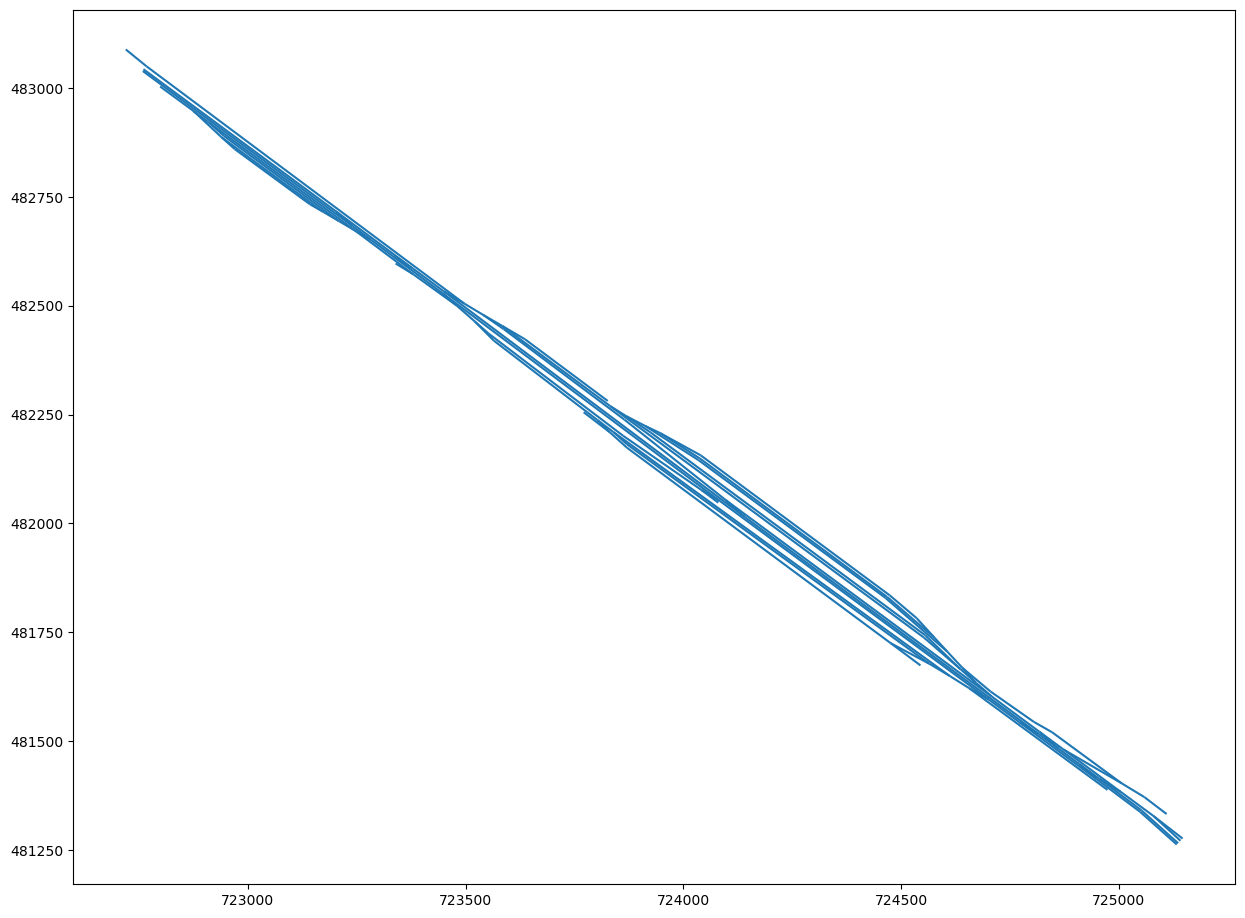

In [319]:
# Visualize the data
gdf.plot(figsize=(15, 15))

In [320]:
rotate_angle = 38

#Siedlce: 38

In [321]:
df_rotated2 = gdf.rotate(rotate_angle, origin=gdf.unary_union.centroid)

<Axes: >

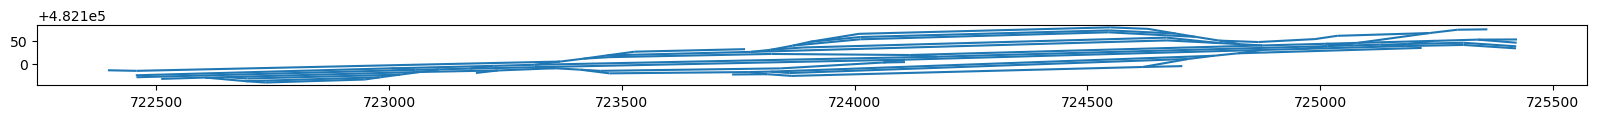

In [322]:
df_rotated2.plot(figsize=(20, 20))

In [323]:
# Explore the GeoDataFrame
print(gdf.head())

     id   skrot   nazwa pochyl vmax_poc vmax_ezt vmax_t promien  \
0  None  es_1Sa  es_1Sa   None     None     None   None    None   
1  None  es_1Sb  es_1Sb   None     None     None   None    None   
2  None   es_2K   es_2K   None     None     None   None    None   
3  None   es_1K   es_1K   None     None     None   None    None   
4  None  es_1-2  es_1-2   None     None     None   None    None   

                                            geometry  
0  MULTILINESTRING ((722720.101 483088.065, 72276...  
1  MULTILINESTRING ((722767.897 483049.129, 72349...  
2  MULTILINESTRING ((722760.577 483042.707, 72320...  
3  MULTILINESTRING ((722759.164 483038.501, 72324...  
4  MULTILINESTRING ((723202.218 482716.668, 72324...  


In [324]:
# Explore the GeoDataFrame
print(df_rotated2.head())

0    MULTILINESTRING ((722396.025 482087.193, 72245...
1    MULTILINESTRING ((722457.660 482085.937, 72336...
2    MULTILINESTRING ((722455.846 482076.370, 72300...
3    MULTILINESTRING ((722457.322 482072.185, 72305...
4    MULTILINESTRING ((723004.593 482091.349, 72305...
dtype: geometry


In [325]:
# TO DELETE

# Save the GeoDataFrame as a GeoJSON file
df_rotated2.to_file('temp.geojson', driver='GeoJSON')

In [326]:
#TO DELETE
geojson_path2 = 'temp.geojson'

In [327]:
# Wczytaj plik GeoJSON
gdf = gpd.read_file(geojson_path2)

In [328]:
# Oblicz minimalne współrzędne (xmin, ymin) dla każdego z geometrii
min_coords = gdf.bounds.min()

In [329]:
# Przesuń wszystkie geometrie w lewo i w dół o wartości minimalnych współrzędnych
gdf['geometry'] = gdf.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])

In [330]:
# Explore the GeoDataFrame
print(gdf.head())

                                            geometry
0    MULTILINESTRING ((0.000 26.332, 61.635 25.076))
1  MULTILINESTRING ((61.635 25.076, 971.540 45.027))
2  MULTILINESTRING ((59.821 15.509, 608.568 30.488))
3  MULTILINESTRING ((61.297 11.324, 660.267 27.218))
4  MULTILINESTRING ((608.568 30.488, 660.267 27.2...


<Axes: >

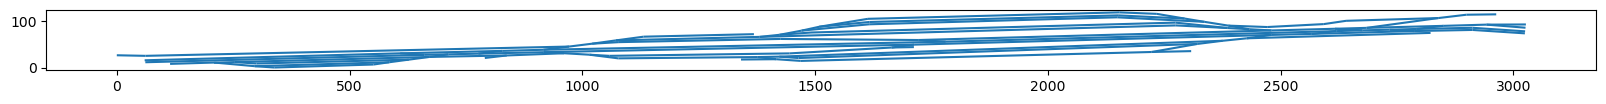

In [331]:
gdf.plot(figsize=(20, 20))

In [332]:
# Function to scale the x-coordinates by a factor
def scale_x(geometry, factor):
    return affine_transform(geometry, [factor, 0, 0, 1, 0, 0])

In [333]:
# Apply the scaling operation to the geometry column
gdf['geometry'] = gdf['geometry'].apply(scale_x, factor=1/4)

In [334]:
# Explore the GeoDataFrame
print(gdf.head())

                                            geometry
0    MULTILINESTRING ((0.000 26.332, 15.409 25.076))
1  MULTILINESTRING ((15.409 25.076, 242.885 45.027))
2  MULTILINESTRING ((14.955 15.509, 152.142 30.488))
3  MULTILINESTRING ((15.324 11.324, 165.067 27.218))
4  MULTILINESTRING ((152.142 30.488, 165.067 27.2...


In [335]:
df_rotated3 = gdf.rotate(-5, origin=gdf.unary_union.centroid)

<Axes: >

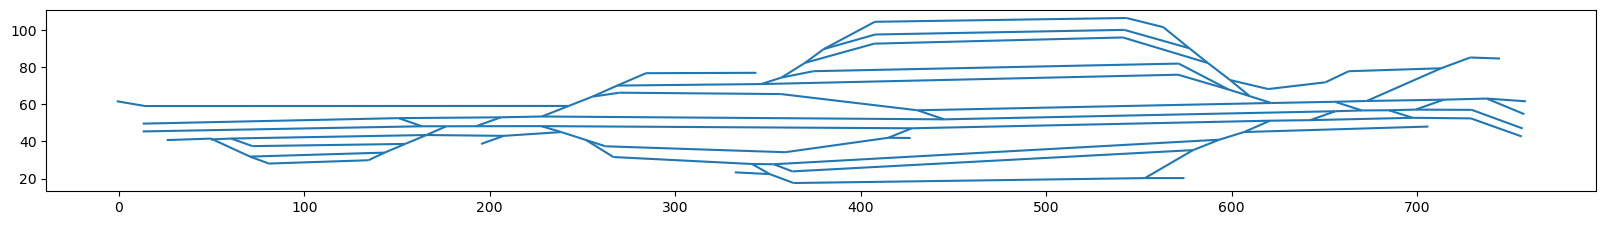

In [336]:
df_rotated3.plot(figsize=(20, 20))

In [337]:
print(df_rotated3.head())

0     MULTILINESTRING ((-1.075 61.708, 14.166 59.114))
1    MULTILINESTRING ((14.166 59.114, 242.515 59.163))
2    MULTILINESTRING ((12.880 49.623, 150.850 52.589))
3    MULTILINESTRING ((12.883 45.422, 163.441 48.204))
4    MULTILINESTRING ((150.850 52.589, 163.441 48.2...
dtype: geometry


In [338]:
# Save the GeoDataFrame as a GeoJSON file
df_rotated3.to_file('2024-01-24_elem-siec_isa_rotated.geojson', driver='GeoJSON')

In [339]:
import geopandas as gpd
from shapely.geometry import mapping
import xml.etree.ElementTree as ET
from xml.dom import minidom


# RailML XML namespace
railml_ns = {"railml": "http://www.railml.org/schemas/2013"}

# Create RailML XML document
railml_root = ET.Element("railml", nsmap=railml_ns)

# Iterate through GeoDataFrame features
for index, row in gdf.iterrows():
    # Extract geometry from GeoDataFrame
    geometry = row['geometry']

    # Convert Shapely geometry to GeoJSON-like dictionary
    geometry_dict = mapping(geometry)

    # Create RailML track element
    track_element = ET.SubElement(railml_root, "track", nsmap=railml_ns)

    # Create RailML geometry element
    geometry_element = ET.SubElement(track_element, "geometry", nsmap=railml_ns)

    # Add RailML point elements based on GeoJSON-like geometry
    for coord in geometry_dict['coordinates']:
        point_element = ET.SubElement(geometry_element, "point", nsmap=railml_ns)
        point_element.set("x", str(coord[0]))
        point_element.set("y", str(coord[1]))
        # Add additional attributes as needed

# Create a formatted XML string
xml_string = ET.tostring(railml_root, encoding='utf-8')
xml_pretty_string = minidom.parseString(xml_string).toprettyxml(indent="  ")

# Save or print the RailML XML
with open("output_railml.xml", "w") as xml_file:
    xml_file.write(xml_pretty_string)


In [340]:
# Save the RailML XML to a file
output_file_path = "output_railml.xml"
with open(output_file_path, "w") as xml_file:
    xml_file.write(xml_pretty_string)

# Print a message indicating where the XML is saved
print(f"RailML XML saved to: {output_file_path}")

RailML XML saved to: output_railml.xml
